In [30]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"] 
df = pd.read_csv(r"magic04.data", names=cols)

In [3]:
df.head()#We can see we don't have labels in these, so we are gonna add labels to them

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"].unique()#g-> Gamma, h-> Hydrones
#converting this 0-> g and 1 -> h

array(['g', 'h'], dtype=object)

In [5]:
df["class"] = (df["class"] == "g").astype(int)

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


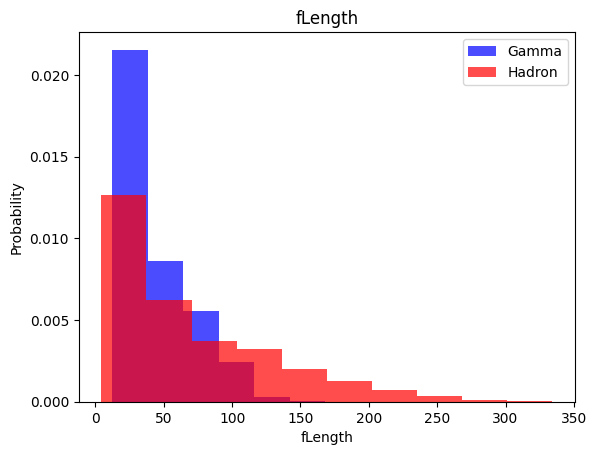

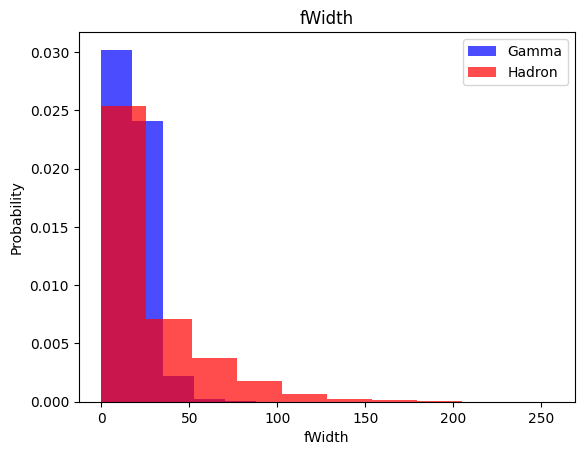

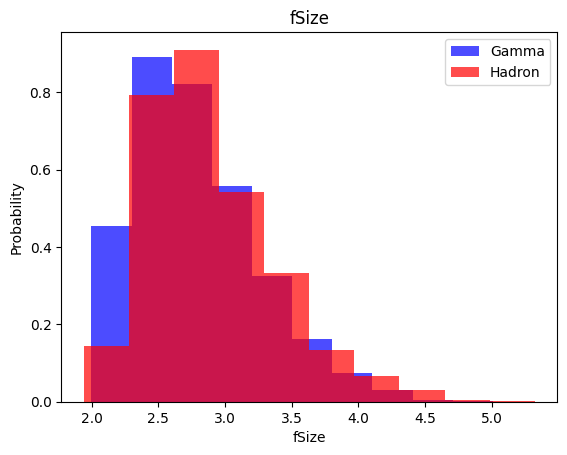

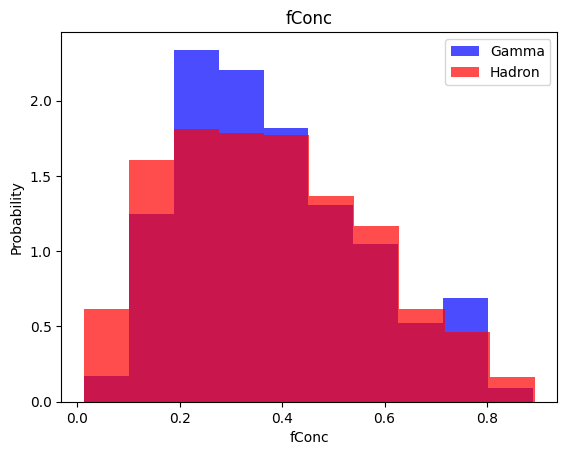

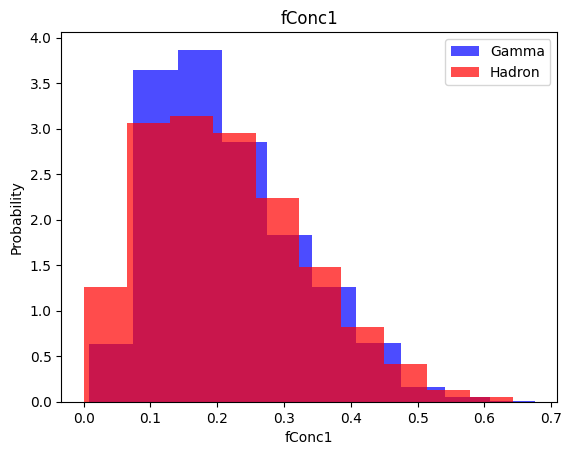

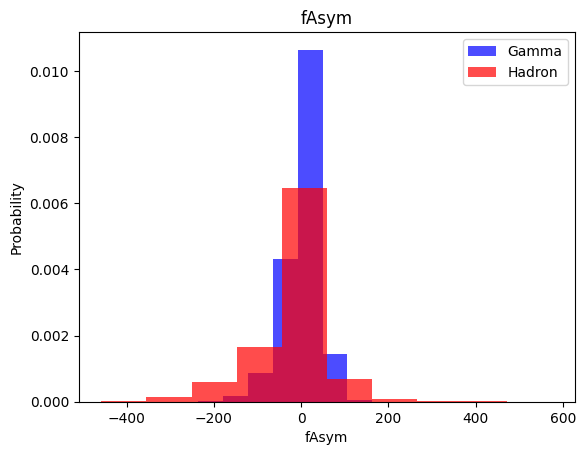

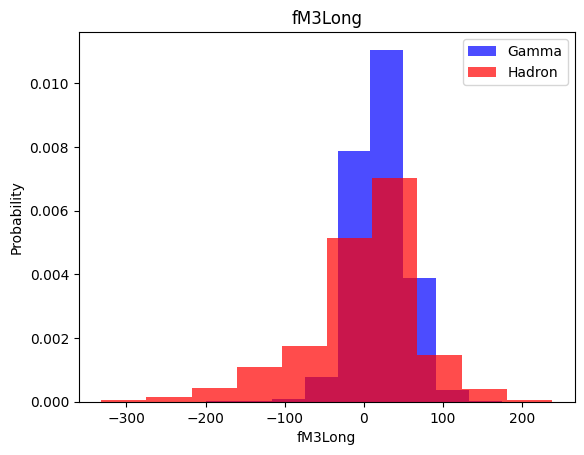

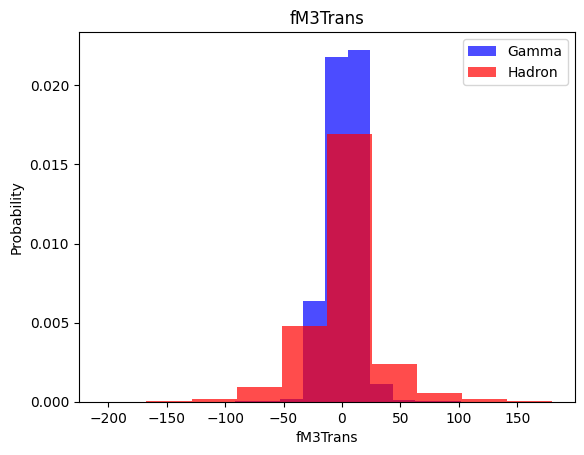

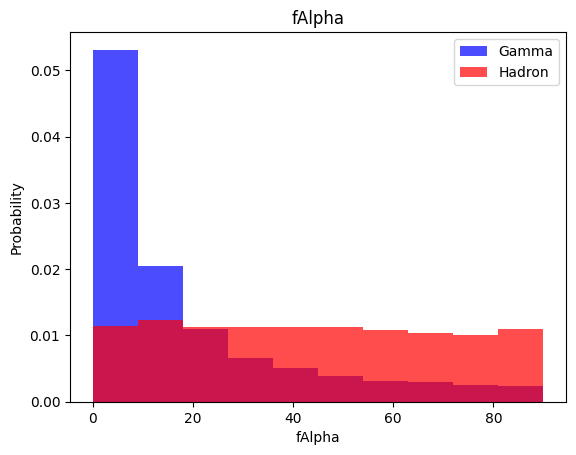

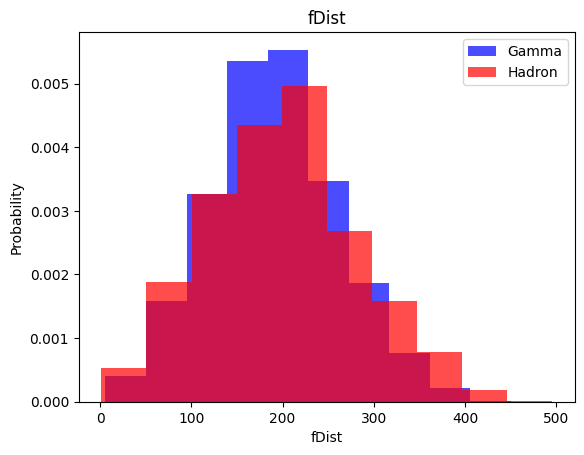

In [7]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color="blue", label="Gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0] [label], color="red", label="Hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Creating Train, Testing and Validation Datasets

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y  = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [10]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
13493,19.5002,9.5863,2.5136,0.5742,0.4117,23.7574,20.5253,-6.5799,22.7796,145.2303,0
1042,37.0078,16.9054,2.8287,0.3071,0.1758,33.2045,24.3286,10.5076,3.6622,200.6440,1
12536,206.1990,126.8380,3.4925,0.1615,0.0832,-132.5940,92.6391,-111.8750,35.2320,218.9620,0
19,44.7394,15.6364,2.6380,0.3107,0.1715,14.0430,37.2246,12.4183,3.2510,221.8060,1
8573,22.3934,10.1082,2.3139,0.5728,0.2888,31.1131,-15.0826,-7.6179,47.2156,155.7770,1
...,...,...,...,...,...,...,...,...,...,...,...
8393,28.1079,11.0454,2.5072,0.5505,0.2939,35.4624,17.6704,-10.6457,14.9480,165.6880,1
9091,52.3941,19.6636,3.3800,0.2709,0.1536,24.2068,43.4488,-11.0781,8.7641,174.0650,1
13017,112.9020,56.9442,3.3568,0.2599,0.1814,-2.5354,116.2480,-38.3150,73.2598,319.6590,0
12359,22.3098,15.0676,2.3535,0.5549,0.3182,29.2720,-4.5585,6.6847,34.0497,51.1374,0


In [11]:
print(len(train[train["class"] == 1])) #Gamma Ones
print(len(train[train["class"] == 0])) #Hydron Ones

7343
4069


In [12]:
train, X_train, y_train  =  scale_dataset(train, oversample=True)
valid, X_valid, y_valid  =  scale_dataset(valid, oversample=False)
test, X_test, y_test  =  scale_dataset(test, oversample=False)

In [13]:
len(y_train)

14686

In [14]:
sum(y_train == 1)

7343

In [15]:
sum(y_train == 0)

7343

# Using k-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # for classification report

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5) #Try n_neighbors value 1,3 and 5 and check the result
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1312
           1       0.86      0.86      0.86      2492

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# Using Naive bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [22]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52      1312
           1       0.75      0.89      0.81      2492

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [25]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1312
           1       0.85      0.81      0.83      2492

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



# Support Vector Machine

In [26]:
#SVM Implementation
from sklearn.svm import SVC

In [27]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [28]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1312
           1       0.90      0.88      0.89      2492

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [32]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
nn_model = tf.keras.Sequential()